In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
np.set_printoptions(suppress=True)


2024-03-14 08:58:59.228949: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-14 08:59:00.374008: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-14 08:59:00.423832: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-14 08:59:00.423851: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

In [4]:
df = pd.read_csv("../raw_data/final_df.csv")
df.head()

/tmp/ipykernel_294188/161520043.py:1: DtypeWarning: Columns (53,62,71,80,89,98,107,116,122,123) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../raw_data/final_df.csv")


,meeting_id,meeting_name,date,country_code,event_number,distance,distance_unit,distance_furlongs,distance_raw_furlongs,race_class,race_class_normalised,prize_money_currency,total_prize_money,track_condition,race_type,track_type,barrier,number,finish_position,win_or_lose,failed_to_finish_reason,margin,gear,jockey_allowance,jockey_allowance_unit,handicap_weight,handicap_weight_unit,jockey_id,jockey_name,tainer_id,trainer_name,dslr,horse_id,horse_name,sire,dam,age,birth_date,official rating,wfa,weight_adjustment,bet365_odds,pmu_odds,betfair_starting_price,pre_race_master_rating_int,pre_race_master_rating_symbol,post_race_master_rating_int,post_race_master_rating_symbol,starting_price,run_1_raw_post_race_rating_int,run_1_raw_post_race_rating_symbol,run_1_final_rating_int,run_1_race_type,run_1_race_class_normalised,run_1_race_class,run_1_track_type,run_1_win_lose,run_1_dsr,run_2_raw_post_race_rating_int,run_2_raw_post_race_rating_symbol,run_2_final_rating_int,run_2_race_type,run_2_race_class,run_2_race_class_normalised,run_2_track_type,run_2_win_lose,run_2_dsr,run_3_raw_post_race_rating_int,run_3_raw_post_race_rating_symbol,run_3_final_rating_int,run_3_race_type,run_3_race_class,run_3_race_class_normalised,run_3_track_type,run_3_win_lose,run_3_dsr,run_4_raw_post_race_rating_int,run_4_raw_post_race_rating_symbol,run_4_final_rating_int,run_4_race_type,run_4_race_class,run_4_race_class_normalised,run_4_track_type,run_4_win_lose,run_4_dsr,run_5_raw_post_race_rating_int,run_5_raw_post_race_rating_symbol,run_5_final_rating_int,run_5_race_type,run_5_race_class,run_5_race_class_normalised,run_5_track_type,run_5_win_lose,run_5_dsr,run_6_raw_post_race_rating_int,run_6_raw_post_race_rating_symbol,run_6_final_rating_int,run_6_race_type,run_6_race_class,run_6_race_class_normalised,run_6_track_type,run_6_win_lose,run_6_dsr,run_7_raw_post_race_rating_int,run_7_raw_post_race_rating_symbol,run_7_final_rating_int,run_7_race_type,run_7_race_class,run_7_race_class_normalised,run_7_track_type,run_7_win_lose,run_7_dsr,run_8_raw_post_race_rating_int,run_8_raw_post_race_rating_symbol,run_8_final_rating_int,run_8_race_type,run_8_race_class,run_8_race_class_normalised,run_8_track_type,run_8_win_lose,run_8_dsr,id_lewagon,Date,Place,Runners,OffR,Min Price,Max Price,BSP,15 Mins,10 mins,5 mins,3 mins,2 mins,1 min,Post Time,Last Traded Price,temperature_2m_mean,precipitation_sum,wind_speed_10m_max
0,10237,PONTEFRACT,2020-10-05,GBR,7,1766,yards,8f,8.0,5,Handicap,GBP,5445,SOFT,FLAT,TURF,6,2,4.0,0.0,NaN,4.5,NaN,5.0,lbs,136.0,lbs,4153,Billy Garritty,3533,Richard Fahey,24.0,67486,fraternity,Zoffany,Aurora Borealis,3,2017-02-16,77.0,3.0,4.0,6.0,NaN,7.168842,80.0,++,65.0,NaN,6.0,71.0,NaN,72.0,FLAT,4,Handicap,TURF,0.0,24.0,58.0,NaN,59.0,FLAT,4,Handicap,TURF,0.0,60.0,79.0,++,80.0,FLAT,5,Handicap,TURF,1.0,89.0,63.0,NaN,64.0,FLAT,5,Handicap,AWT,0.0,123.0,68.0,NaN,69.0,FLAT,4,Novice,TURF,0.0,401.0,68.0,NaN,69.0,FLAT,5,Maiden,TURF,0.0,443.0,79.0,+,80.0,FLAT,4,Novice,TURF,0.0,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fraternity_2020-10-05,2020-10-05,4,13.0,77.0,3.65,1000.0,7.17,8.2,8.0,7.8,9.2,9.2,7.4,7.0,1000.0,12.3,2.2,14.3
1,10237,PONTEFRACT,2020-10-05,GBR,7,1766,yards,8f,8.0,5,Handicap,GBP,5445,SOFT,FLAT,TURF,8,1,5.0,0.0,NaN,13.5,NaN,0.0,lbs,139.0,lbs,3846,James Sullivan,4005,Michael Easterby,30.0,60947,eligible,Dark Angel,Secrets Away,4,2016-04-14,77.0,0.0,1.0,101.0,NaN,154.661768,85.0,+,48.0,NaN,101.0,38.0,NaN,39.0,FLAT,4,Handicap,TURF,0.0,30.0,84.0,+,85.0,FLAT,4,Handicap,AWT,0.0,362.0,83.0,NaN,84.0,FLAT,4,Handicap,TURF,0.0,401.0,81.0,++,82.0,FLAT,4,Handicap,AWT,0.0,413.0,83.0,++,84.0,FLAT,5,Handicap,TURF,1.0,438.0,82.0,++,83.0,FLAT,5,Handicap,AWT,0.0,453.0,73.0,+,74.0,FLAT,5,Handicap,TURF,0.0,468.0,73.0,++,74.0,FLAT,4,Maiden,TURF,0.0,504.0,eligible_2020-10-05,2020-10-05,5,13.0,77.0,90.00,1000.0,154.66,95.0,90.0,120.0,140.0,150.0,180.0,180.0,1000.0,12.3,2.2,14.3
2,10237,PONTEFRACT,2020-10-05,GBR,6,1766,yards,8f,8.0,5,Maiden,GBP,5410,SOFT,FLAT,TURF,9,12,6.0,0.0,NaN,34.0,

In [5]:
df['unique_id'] = df['meeting_id'].astype(str) + "_" + df['event_number'].astype(str) 

In [6]:
df.head()

,meeting_id,meeting_name,date,country_code,event_number,distance,distance_unit,distance_furlongs,distance_raw_furlongs,race_class,race_class_normalised,prize_money_currency,total_prize_money,track_condition,race_type,track_type,barrier,number,finish_position,win_or_lose,failed_to_finish_reason,margin,gear,jockey_allowance,jockey_allowance_unit,handicap_weight,handicap_weight_unit,jockey_id,jockey_name,tainer_id,trainer_name,dslr,horse_id,horse_name,sire,dam,age,birth_date,official rating,wfa,weight_adjustment,bet365_odds,pmu_odds,betfair_starting_price,pre_race_master_rating_int,pre_race_master_rating_symbol,post_race_master_rating_int,post_race_master_rating_symbol,starting_price,run_1_raw_post_race_rating_int,run_1_raw_post_race_rating_symbol,run_1_final_rating_int,run_1_race_type,run_1_race_class_normalised,run_1_race_class,run_1_track_type,run_1_win_lose,run_1_dsr,run_2_raw_post_race_rating_int,run_2_raw_post_race_rating_symbol,run_2_final_rating_int,run_2_race_type,run_2_race_class,run_2_race_class_normalised,run_2_track_type,run_2_win_lose,run_2_dsr,run_3_raw_post_race_rating_int,run_3_raw_post_race_rating_symbol,run_3_final_rating_int,run_3_race_type,run_3_race_class,run_3_race_class_normalised,run_3_track_type,run_3_win_lose,run_3_dsr,run_4_raw_post_race_rating_int,run_4_raw_post_race_rating_symbol,run_4_final_rating_int,run_4_race_type,run_4_race_class,run_4_race_class_normalised,run_4_track_type,run_4_win_lose,run_4_dsr,run_5_raw_post_race_rating_int,run_5_raw_post_race_rating_symbol,run_5_final_rating_int,run_5_race_type,run_5_race_class,run_5_race_class_normalised,run_5_track_type,run_5_win_lose,run_5_dsr,run_6_raw_post_race_rating_int,run_6_raw_post_race_rating_symbol,run_6_final_rating_int,run_6_race_type,run_6_race_class,run_6_race_class_normalised,run_6_track_type,run_6_win_lose,run_6_dsr,run_7_raw_post_race_rating_int,run_7_raw_post_race_rating_symbol,run_7_final_rating_int,run_7_race_type,run_7_race_class,run_7_race_class_normalised,run_7_track_type,run_7_win_lose,run_7_dsr,run_8_raw_post_race_rating_int,run_8_raw_post_race_rating_symbol,run_8_final_rating_int,run_8_race_type,run_8_race_class,run_8_race_class_normalised,run_8_track_type,run_8_win_lose,run_8_dsr,id_lewagon,Date,Place,Runners,OffR,Min Price,Max Price,BSP,15 Mins,10 mins,5 mins,3 mins,2 mins,1 min,Post Time,Last Traded Price,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,unique_id
0,10237,PONTEFRACT,2020-10-05,GBR,7,1766,yards,8f,8.0,5,Handicap,GBP,5445,SOFT,FLAT,TURF,6,2,4.0,0.0,NaN,4.5,NaN,5.0,lbs,136.0,lbs,4153,Billy Garritty,3533,Richard Fahey,24.0,67486,fraternity,Zoffany,Aurora Borealis,3,2017-02-16,77.0,3.0,4.0,6.0,NaN,7.168842,80.0,++,65.0,NaN,6.0,71.0,NaN,72.0,FLAT,4,Handicap,TURF,0.0,24.0,58.0,NaN,59.0,FLAT,4,Handicap,TURF,0.0,60.0,79.0,++,80.0,FLAT,5,Handicap,TURF,1.0,89.0,63.0,NaN,64.0,FLAT,5,Handicap,AWT,0.0,123.0,68.0,NaN,69.0,FLAT,4,Novice,TURF,0.0,401.0,68.0,NaN,69.0,FLAT,5,Maiden,TURF,0.0,443.0,79.0,+,80.0,FLAT,4,Novice,TURF,0.0,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fraternity_2020-10-05,2020-10-05,4,13.0,77.0,3.65,1000.0,7.17,8.2,8.0,7.8,9.2,9.2,7.4,7.0,1000.0,12.3,2.2,14.3,10237_7
1,10237,PONTEFRACT,2020-10-05,GBR,7,1766,yards,8f,8.0,5,Handicap,GBP,5445,SOFT,FLAT,TURF,8,1,5.0,0.0,NaN,13.5,NaN,0.0,lbs,139.0,lbs,3846,James Sullivan,4005,Michael Easterby,30.0,60947,eligible,Dark Angel,Secrets Away,4,2016-04-14,77.0,0.0,1.0,101.0,NaN,154.661768,85.0,+,48.0,NaN,101.0,38.0,NaN,39.0,FLAT,4,Handicap,TURF,0.0,30.0,84.0,+,85.0,FLAT,4,Handicap,AWT,0.0,362.0,83.0,NaN,84.0,FLAT,4,Handicap,TURF,0.0,401.0,81.0,++,82.0,FLAT,4,Handicap,AWT,0.0,413.0,83.0,++,84.0,FLAT,5,Handicap,TURF,1.0,438.0,82.0,++,83.0,FLAT,5,Handicap,AWT,0.0,453.0,73.0,+,74.0,FLAT,5,Handicap,TURF,0.0,468.0,73.0,++,74.0,FLAT,4,Maiden,TURF,0.0,504.0,eligible_2020-10-05,2020-10-05,5,13.0,77.0,90.00,1000.0,154.66,95.0,90.0,120.0,140.0,150.0,180.0,180.0,1000.0,12.3,2.2,14.3,10237_7
2,10237,PONTEFRACT,2020-10-05,GBR,6,1766,yards,8f,8.0,5,Maiden,GBP,5410,SOFT,FLAT,T

In [7]:
df.win_or_lose.value_counts()

win_or_lose
0.0    161868
1.0     20194
0.5        94
Name: count, dtype: int64

In [8]:
df.info(verbose=True, show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182156 entries, 0 to 182155
Data columns (total 141 columns):
 #    Column                             Non-Null Count   Dtype  
---   ------                             --------------   -----  
 0    meeting_id                         182156 non-null  int64  
 1    meeting_name                       182156 non-null  object 
 2    date                               182156 non-null  object 
 3    country_code                       182156 non-null  object 
 4    event_number                       182156 non-null  int64  
 5    distance                           182156 non-null  int64  
 6    distance_unit                      182156 non-null  object 
 7    distance_furlongs                  182156 non-null  object 
 8    distance_raw_furlongs              182156 non-null  float64
 9    race_class                         182156 non-null  int64  
 10   race_class_normalised              181842 non-null  object 
 11   prize_money_currency    

In [9]:
from pipeline_cleaning import clean_data, transforming_data


In [10]:
df_clean = clean_data(df)
df_clean.head(10)

/home/tomi/code/Harlequinht/which_horse/notebook/pipeline_cleaning.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['finish_position'].fillna(df['Place'], inplace=True)
/home/tomi/code/Harlequinht/which_horse/notebook/pipeline_cleaning.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['PU' 'PU' 'UR' 'PU' 'PU' 'PU' 'UR' 'PU' 'SU' 'UR' 'UR' 'RR' 'PU' 'F' 'PU'
 'F' 'PU' 'PU' 'PU' 'PU' 'PU' 'PU' 'F' 'PU' 'PU' 'BD' 'F' 'RR' 'PU' 'PU'
 'PU'

,date,event_number,distance,race_class,race_class_normalised,total_prize_money,track_condition,race_type,track_type,barrier,finish_position,win_or_lose,margin,gear,jockey_allowance,handicap_weight,jockey_id,tainer_id,dslr,wfa,weight_adjustment,pre_race_master_rating_int,starting_price,place,runners,min_price,max_price,bsp,15_mins,10_mins,5_mins,3_mins,2_mins,1_min_,post_time,last_traded_price,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,unique_id,rating_oficial,current_age
54106,2021-08-20,4,1554,4,Novice,13771,STANDARD TO SLOW,FLAT,AWT,3,6.0,0.0,17.00,0,0.0,131.0,3859,4145,NaN,0.0,9.0,NaN,29.0,6.0,8.0,46.00,1000.0,46.95,40.0,48.0,55.0,48.0,46.0,50.00,55.0,1000.00,16.2,1.1,7.6,28399_4,NaN,5.0
59709,2021-09-15,4,1636,5,Novice,7377,SOFT,FLAT,TURF,4,4.0,0.0,4.50,0,0.0,129.0,3939,4145,26.0,0.0,11.0,44.0,67.0,4.0,10.0,90.00,1000.0,100.00,90.0,70.0,50.0,70.0,75.0,80.00,80.0,1000.00,14.9,0.1,9.1,28734_4,NaN,6.0
63559,2021-10-02,1,1540,4,Novice,9837,GOOD,FLAT,TURF,7,6.0,0.0,10.75,0,0.0,131.0,3939,4145,17.0,0.0,9.0,66.0,67.0,6.0,9.0,60.00,1000.0,200.00,42.0,55.0,50.0,50.0,60.0,140.00,200.0,1000.00,10.6,9.5,22.1,28895_1,NaN,6.0
65634,2021-10-13,4,1835,5,Handicap,5902,GOOD TO SOFT,FLAT,TURF,1,10.0,0.0,10.25,0,0.0,128.0,3939,4145,11.0,0.0,12.0,69.0,67.0,10.0,11.0,50.00,1000.0,105.41,50.0,55.0,55.0,60.0,55.0,140.00,120.0,1000.00,12.4,0.1,10.8,29008_4,65.0,6.0
24837,2021-04-12,3,1759,4,Handicap,7918,GOOD,FLAT,TURF,2,1.0,1.0,1759.00,0,0.0,132.0,713,3897,205.0,0.0,8.0,96.0,3.5,1.0,8.0,1.01,6.0,3.77,6.2,6.2,6.2,5.2,4.6,4.40,4.0,1.01,2.6,0.6,10.7,26632_3,83.0,1.0
44203,2021-07-09,4,2256,4,Handicap,9837,GOOD,FLAT,TURF,8,12.0,0.0,12.75,0,0.0,131.0,713,3897,88.0,10.0,9.0,87.0,6.0,12.0,13.0,6.20,950.0,7.80,6.6,6.8,6.2,5.9,5.9,6.60,8.2,950.00,17.3,0.7,7.4,27925_4,86.0,3.0
48236,2021-07-28,4,1759,4,Handicap,8361,GOOD,FLAT,TURF,3,5.0,0.0,5.75,0,0.0,140.0,713,3897,19.0,0.0,0.0,87.0,4.0,5.0,5.0,2.00,1000.0,4.20,4.7,4.7,4.6,4.5,4.4,3.95,4.2,1000.00,16.3,2.0,15.4,28172_4,86.0,4.0
50910,2021-08-07,2,1797,3,Handicap,14755,SOFT,FLAT,TURF,2,5.0,0.0,12.00,0,0.0,123.0,713,3897,10.0,7.0,17.0,97.0,6.0,5.0,5.0,4.10,1000.0,6.25,12.5,12.0,12.5,10.0,9.6,6.40,7.0,1000.00,14.6,17.6,17.6,28273_2,85.0,4.0
55645,2021-08-27,5,1540,4,Handicap,8656,GOOD,FLAT,TURF,9,2.0,0.0,1.25,0,0.0,133.0,713,3897,20.0,5.0,7.0,89.0,34.0,2.0,11.0,21.00,980.0,45.59,38.0,38.0,48.0,38.0,40.0,40.00,42.0,980.00,13.8,0.2,13.0,28540_5,84.0,5.0
57516,2021-09-04,5,1758,3,Handicap,20175,GOOD,FLAT,TURF,3,2.0,0.0,0.08,0,0.0,124.0,713,3897,8.0,0.0,16.0,103.0,15.0,2.0,7.0,1.40,32.0,20.00,16.0,16.5,16.5,17.0,17.0,17.50,18.0,2.00,14.1,0.3,8.0,28652_5,84.0,5.0


In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170812 entries, 54106 to 1891
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   date                        170812 non-null  datetime64[ns]
 1   event_number                170812 non-null  int64         
 2   distance                    170812 non-null  int64         
 3   race_class                  170812 non-null  int64         
 4   race_class_normalised       170555 non-null  object        
 5   total_prize_money           170812 non-null  int64         
 6   track_condition             170812 non-null  object        
 7   race_type                   170812 non-null  object        
 8   track_type                  170812 non-null  object        
 9   barrier                     170812 non-null  int64         
 10  finish_position             170812 non-null  object        
 11  win_or_lose                 170812 non-nul

In [10]:
df_train_transformed_with_columns, df_val_transformed_with_columns, df_test_transformed_with_columns, pipeline = transforming_data(df_clean)

/home/leo/code/leocmcheung/tmp/pipeline_cleaning.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=['date'], axis=1, inplace=True)
/home/leo/code/leocmcheung/tmp/pipeline_cleaning.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val.drop(columns=['date'], axis=1, inplace=True)
/home/leo/code/leocmcheung/tmp/pipeline_cleaning.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(columns=['date

In [11]:
df_train_transformed_with_columns.win_or_lose.value_counts()

0.0    65345
1.0     8024
0.5       32
Name: win_or_lose, dtype: int64

In [12]:
df_train_transformed_with_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73401 entries, 0 to 73400
Data columns (total 76 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   barrier_1                         73401 non-null  object
 1   barrier_2                         73401 non-null  object
 2   barrier_3                         73401 non-null  object
 3   barrier_4                         73401 non-null  object
 4   barrier_5                         73401 non-null  object
 5   barrier_6                         73401 non-null  object
 6   barrier_7                         73401 non-null  object
 7   barrier_8                         73401 non-null  object
 8   barrier_9                         73401 non-null  object
 9   barrier_10                        73401 non-null  object
 10  barrier_11                        73401 non-null  object
 11  barrier_12                        73401 non-null  object
 12  barrier_13        

In [13]:
df_train_transformed_with_columns = df_train_transformed_with_columns.drop(columns=['15_mins', '10_mins',  '3_mins', '2_mins', '1_min_','place', 'starting_price', 'min_price', 'max_price','unique_id']).astype(np.float32)
df_val_transformed_with_columns = df_val_transformed_with_columns.drop(columns=['15_mins', '10_mins',  '3_mins', '2_mins', '1_min_','place', 'starting_price', 'min_price', 'max_price', 'unique_id']).astype(np.float32)
df_test_transformed_with_columns = df_test_transformed_with_columns.drop(columns=['15_mins', '10_mins',  '3_mins', '2_mins', '1_min_','place', 'starting_price', 'min_price', 'max_price']).astype(np.float32)

backtest_test = df_test_transformed_with_columns.copy()

df_test_transformed_with_columns = df_test_transformed_with_columns.drop(columns=['unique_id'])
df_train_transformed_with_columns["5_mins"] = 1/df_train_transformed_with_columns["5_mins"]
df_val_transformed_with_columns["5_mins"] = 1/df_val_transformed_with_columns["5_mins"]
df_test_transformed_with_columns["5_mins"] = 1/df_test_transformed_with_columns["5_mins"]

In [14]:
df_train_transformed_with_columns.head(10)

,barrier_1,barrier_2,barrier_3,barrier_4,barrier_5,barrier_6,barrier_7,barrier_8,barrier_9,barrier_10,barrier_11,barrier_12,barrier_13,barrier_14,barrier_15,barrier_16,barrier_17,barrier_18,barrier_19,barrier_20,track_condition_FAST,track_condition_FIRM,track_condition_GOOD,track_condition_GOOD TO FIRM,track_condition_GOOD TO SOFT,track_condition_HEAVY,track_condition_SOFT,track_condition_STANDARD,track_condition_STANDARD TO FAST,track_condition_STANDARD TO SLOW,race_type_NATIONAL_HUNT_FLAT,track_type_TURF,race_class_normalised_Claiming,race_class_normalised_Conditions,race_class_normalised_Grade 1,race_class_normalised_Grade 2,race_class_normalised_Group 1,race_class_normalised_Group 2,race_class_normalised_Group 3,race_class_normalised_Handicap,race_class_normalised_Listed,race_class_normalised_Maiden,race_class_normalised_NHF,race_class_normalised_Novice,race_class_normalised_Selling,race_class_1,race_class_2,race_class_3,race_class_4,race_class_5,race_class_6,distance,total_prize_money,jockey_allowance,handicap_weight,wfa,weight_adjustment,bsp,current_age,runners,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,win_or_lose,gear,5_mins
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.469828,-0.003438,-0.484515,0.085958,-0.339263,-0.395887,-0.045468,-0.118245,-0.678297,0.995120,-0.317643,-1.096076,0.0,0.0,0.018182
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.352983,-0.144375,-0.484515,-0.162625,-0.339263,-0.047512,0.329428,0.207861,-0.048197,0.742134,-0.566062,-0.795570,0.0,0.0,0.020000
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.489777,-0.090152,-0.484515,0.085958,-0.339263,-0.395887,1.036112,0.207861,-0.363247,-0.094664,1.769083,1.808814,0.0,0.0,0.020000
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.069419,-0.176888,-0.484515,-0.286916,-0.339263,0.126676,0.367660,0.207861,0.266853,0.255623,-0.566062,-0.454997,0.0,0.0,0.018182
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.177715,-0.132451,-0.484515,0.210249,-0.339263,-0.570074,-0.350614,-1.422670,-0.678297,-1.651499,-0.441852,-0.475030,1.0,0.0,0.161290
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.530481,-0.090152,-0.484515,0.085958,3.317937,-0.395887,-0.322135,-0.770457,0.896954,1.209184,-0.417010,-1.136143,0.0,0.0,0.161290
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.177715,-0.122686,-0.484515,1.204580,-0.339263,-1.963575,-0.347576,-0.444351,-1.623448,1.014580,-0.094065,0.466554,0.0,0.0,0.217391
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.123567,0.018252,-0.484515,-0.908372,2.220777,0.997613,-0.333089,-0.444351,-1.623448,0.683753,3.781282,0.907296,0.0,0.0,0.080000
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [15]:
X_train = df_train_transformed_with_columns.drop(columns=['win_or_lose', '5_mins'])
y_train = df_train_transformed_with_columns[['win_or_lose', '5_mins']]
X_val = df_val_transformed_with_columns.drop(columns=['win_or_lose', '5_mins'])
y_val = df_val_transformed_with_columns[['win_or_lose', '5_mins']]
X_test = df_test_transformed_with_columns.drop(columns=['win_or_lose', '5_mins'])
y_test = df_test_transformed_with_columns[['win_or_lose', '5_mins']]


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import Poisson
from tensorflow.keras.optimizers import Adam

MLP2 = Sequential()
MLP2.add(InputLayer(input_shape=(X_train.shape[-1]))) # input layer
MLP2.add(Dense(100, activation='relu')) # hidden layer 1
MLP2.add(Dropout(0.2))
MLP2.add(Dense(50, activation='relu')) # hidden layer 1
MLP2.add(Dropout(0.2))
MLP2.add(Dense(10, activation='relu')) # hidden layer 1
MLP2.add(Dense(2, activation='softmax')) # output layer

2024-03-13 16:56:11.316541: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-13 16:56:11.316579: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-13 16:56:11.316595: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (VIVOLC): /proc/driver/nvidia/version does not exist
2024-03-13 16:56:11.316822: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
MLP2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               6500      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 12,082
Trainable params: 12,082
Non-traina

In [18]:
from keras.utils import get_custom_objects
import tensorflow as tf
from keras import backend as K


def custom_loss_function(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)  # Convert y_true to float32
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    
    win_horse = y_true[:, 0:1]
    win_odds = 1/y_true[:, 1:2]
    gain_loss_vector = K.concatenate([win_horse * (win_odds - 1) + (1 - win_horse) * -1,
    K.zeros_like(win_odds)], axis=1)
    return -0.1 * K.mean(K.sum(gain_loss_vector * y_pred, axis=1))
    #return -1 * tf.reduce_mean(tf.reduce_sum(gain_loss_vector * y_pred, axis=1))

get_custom_objects().update({"custom_loss_function": custom_loss_function})

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73401 entries, 0 to 73400
Data columns (total 64 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   barrier_1                         73401 non-null  float32
 1   barrier_2                         73401 non-null  float32
 2   barrier_3                         73401 non-null  float32
 3   barrier_4                         73401 non-null  float32
 4   barrier_5                         73401 non-null  float32
 5   barrier_6                         73401 non-null  float32
 6   barrier_7                         73401 non-null  float32
 7   barrier_8                         73401 non-null  float32
 8   barrier_9                         73401 non-null  float32
 9   barrier_10                        73401 non-null  float32
 10  barrier_11                        73401 non-null  float32
 11  barrier_12                        73401 non-null  float32
 12  barr

In [20]:

# optimization
MLP2.compile(loss='custom_loss_function',
            optimizer=Adam(learning_rate = 0.0005))

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# train (fit)

es = EarlyStopping(patience=5, restore_best_weights=True)

history = MLP2.fit(X_train, y_train,
                  epochs=200, batch_size=32, verbose=2,
                  validation_data=(X_val, y_val), callbacks = [es], shuffle = True)

Epoch 1/200
2294/2294 - 4s - loss: 7.1764e-04 - val_loss: -9.0419e-04 - 4s/epoch - 2ms/step
Epoch 2/200
2294/2294 - 3s - loss: -9.3653e-04 - val_loss: -1.2605e-03 - 3s/epoch - 2ms/step
Epoch 3/200
2294/2294 - 4s - loss: -2.1851e-03 - val_loss: -2.0435e-03 - 4s/epoch - 2ms/step
Epoch 4/200
2294/2294 - 4s - loss: -3.6419e-03 - val_loss: -2.5948e-03 - 4s/epoch - 2ms/step
Epoch 5/200
2294/2294 - 4s - loss: -4.8051e-03 - val_loss: -2.5907e-03 - 4s/epoch - 2ms/step
Epoch 6/200
2294/2294 - 4s - loss: -6.9235e-03 - val_loss: -2.9358e-03 - 4s/epoch - 2ms/step
Epoch 7/200
2294/2294 - 4s - loss: -7.3833e-03 - val_loss: -3.1618e-03 - 4s/epoch - 2ms/step
Epoch 8/200
2294/2294 - 3s - loss: -7.7672e-03 - val_loss: -3.3403e-03 - 3s/epoch - 1ms/step
Epoch 9/200
2294/2294 - 3s - loss: -8.9372e-03 - val_loss: -3.3696e-03 - 3s/epoch - 1ms/step
Epoch 10/200
2294/2294 - 4s - loss: -8.9025e-03 - val_loss: -2.9345e-03 - 4s/epoch - 2ms/step
Epoch 11/200
2294/2294 - 3s - loss: -9.9420e-03 - val_loss: -3.0746e-0

In [22]:
# evaluate performance on test data
a = MLP2.evaluate(X_test, y_test,
                                         verbose=1)
a

1261/1261 [==============================] - 1s 785us/step - loss: -0.0023


-0.002271434757858515

In [23]:
y_pred = MLP2.predict(X_test)
y_pred

1261/1261 [==============================] - 1s 716us/step


array([[0.9995247 , 0.00047528],
       [0.00005957, 0.99994034],
       [0.06973097, 0.93026906],
       ...,
       [0.01270561, 0.9872944 ],
       [0.9326803 , 0.06731969],
       [0.00090331, 0.99909675]], dtype=float32)

In [24]:
y_test

,win_or_lose,5_mins
0,1.0,0.121951
1,0.0,0.076923
2,0.0,0.058824
3,0.0,0.208333
4,0.0,0.166667
...,...,...
40345,0.0,0.025000
40346,0.0,0.025000
40347,1.0,0.135135
40348,0.0,0.080000


<AxesSubplot:ylabel='Count'>

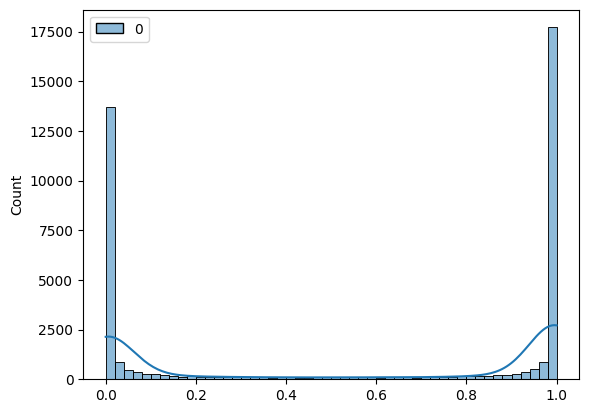

In [25]:
import seaborn as sns
sns.histplot(y_pred[:, 0:1], bins = 50, kde=True)

In [26]:



_test['model_preds'] = y_pred[:, 0:1]
backtest_test['odds_preds'] = 1/ backtest_test['5_mins']
backtest_test['model_edge_basic'] = backtest_test['model_preds'] - backtest_test['odds_preds']
backtest_test['model_edge_proportionate'] = backtest_test['model_preds'] / backtest_test['odds_preds']
#backtest_test = backtest_test.drop(columns=['f_ko'])

In [27]:
backtest_test

,barrier_1,barrier_2,barrier_3,barrier_4,barrier_5,barrier_6,barrier_7,barrier_8,barrier_9,barrier_10,barrier_11,barrier_12,barrier_13,barrier_14,barrier_15,barrier_16,barrier_17,barrier_18,barrier_19,barrier_20,track_condition_FAST,track_condition_FIRM,track_condition_GOOD,track_condition_GOOD TO FIRM,track_condition_GOOD TO SOFT,track_condition_HEAVY,track_condition_SOFT,track_condition_STANDARD,track_condition_STANDARD TO FAST,track_condition_STANDARD TO SLOW,race_type_NATIONAL_HUNT_FLAT,track_type_TURF,race_class_normalised_Claiming,race_class_normalised_Conditions,race_class_normalised_Grade 1,race_class_normalised_Grade 2,race_class_normalised_Group 1,race_class_normalised_Group 2,race_class_normalised_Group 3,race_class_normalised_Handicap,race_class_normalised_Listed,race_class_normalised_Maiden,race_class_normalised_NHF,race_class_normalised_Novice,race_class_normalised_Selling,race_class_1,race_class_2,race_class_3,race_class_4,race_class_5,race_class_6,distance,total_prize_money,jockey_allowance,handicap_weight,wfa,weight_adjustment,bsp,current_age,runners,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,win_or_lose,gear,5_mins,unique_id,model_preds,odds_preds,model_edge_basic,model_edge_proportionate
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.089058,-0.180943,-0.484515,-0.162625,-0.339263,-0.047512,-0.321852,1.838392,0.581904,-1.048225,-0.590904,-0.495064,1.0,0.0,8.2,363163.0,0.999525,0.121951,0.877573,8.196102
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.217303,-0.176733,-0.484515,-0.784081,-0.339263,0.823426,-0.239453,-1.748776,-1.623448,0.352925,2.315606,-0.034289,0.0,0.0,13.0,366351.0,0.000060,0.076923,-0.076864,0.000774
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.701783,-0.159937,-0.484515,-0.411207,-0.339263,0.300863,-0.221786,-1.422670,-0.363247,0.041559,-0.590904,-0.054322,0.0,0.0,17.0,367728.0,0.069731,0.058824,0.010907,1.185426
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.096183,-0.138931,-0.484515,-1.032664,-0.339263,1.171801,-0.344042,-1.422670,-0.048197,1.053501,-0.590904,-0.515098,0.0,0.0,4.8,369816.0,0.563761,0.208333,0.355428,2.706053
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.704633,-0.159937,-0.484515,-1.032664,-0.339263,1.171801,-0.333442,-1.096564,0.266853,0.586451,-0.516378,0.226150,0.0,0.0,6.0,372098.0,0.955878,0.166667,0.789211,5.735267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40345,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.450684,-0.138931,1.978086,0.583123,-0.339263,-1.092637,0.117493,-1.748776,-0.678297,-0.055744,-0.317643,-0.775536,0.0,1.0,40.0,364388.0,0.000069,0.025000,-0.024931,0.002763
40346,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0

In [28]:
backtest_test.shape

(40350, 71)

In [29]:
backtest_test.columns

Index(['barrier_1', 'barrier_2', 'barrier_3', 'barrier_4', 'barrier_5',
       'barrier_6', 'barrier_7', 'barrier_8', 'barrier_9', 'barrier_10',
       'barrier_11', 'barrier_12', 'barrier_13', 'barrier_14', 'barrier_15',
       'barrier_16', 'barrier_17', 'barrier_18', 'barrier_19', 'barrier_20',
       'track_condition_FAST', 'track_condition_FIRM', 'track_condition_GOOD',
       'track_condition_GOOD TO FIRM', 'track_condition_GOOD TO SOFT',
       'track_condition_HEAVY', 'track_condition_SOFT',
       'track_condition_STANDARD', 'track_condition_STANDARD TO FAST',
       'track_condition_STANDARD TO SLOW', 'race_type_NATIONAL_HUNT_FLAT',
       'track_type_TURF', 'race_class_normalised_Claiming',
       'race_class_normalised_Conditions', 'race_class_normalised_Grade 1',
       'race_class_normalised_Grade 2', 'race_class_normalised_Group 1',
       'race_class_normalised_Group 2', 'race_class_normalised_Group 3',
       'race_class_normalised_Handicap', 'race_class_normalised_Lis

In [30]:
backtest_test

,barrier_1,barrier_2,barrier_3,barrier_4,barrier_5,barrier_6,barrier_7,barrier_8,barrier_9,barrier_10,barrier_11,barrier_12,barrier_13,barrier_14,barrier_15,barrier_16,barrier_17,barrier_18,barrier_19,barrier_20,track_condition_FAST,track_condition_FIRM,track_condition_GOOD,track_condition_GOOD TO FIRM,track_condition_GOOD TO SOFT,track_condition_HEAVY,track_condition_SOFT,track_condition_STANDARD,track_condition_STANDARD TO FAST,track_condition_STANDARD TO SLOW,race_type_NATIONAL_HUNT_FLAT,track_type_TURF,race_class_normalised_Claiming,race_class_normalised_Conditions,race_class_normalised_Grade 1,race_class_normalised_Grade 2,race_class_normalised_Group 1,race_class_normalised_Group 2,race_class_normalised_Group 3,race_class_normalised_Handicap,race_class_normalised_Listed,race_class_normalised_Maiden,race_class_normalised_NHF,race_class_normalised_Novice,race_class_normalised_Selling,race_class_1,race_class_2,race_class_3,race_class_4,race_class_5,race_class_6,distance,total_prize_money,jockey_allowance,handicap_weight,wfa,weight_adjustment,bsp,current_age,runners,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,win_or_lose,gear,5_mins,unique_id,model_preds,odds_preds,model_edge_basic,model_edge_proportionate
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.089058,-0.180943,-0.484515,-0.162625,-0.339263,-0.047512,-0.321852,1.838392,0.581904,-1.048225,-0.590904,-0.495064,1.0,0.0,8.2,363163.0,0.999525,0.121951,0.877573,8.196102
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.217303,-0.176733,-0.484515,-0.784081,-0.339263,0.823426,-0.239453,-1.748776,-1.623448,0.352925,2.315606,-0.034289,0.0,0.0,13.0,366351.0,0.000060,0.076923,-0.076864,0.000774
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.701783,-0.159937,-0.484515,-0.411207,-0.339263,0.300863,-0.221786,-1.422670,-0.363247,0.041559,-0.590904,-0.054322,0.0,0.0,17.0,367728.0,0.069731,0.058824,0.010907,1.185426
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.096183,-0.138931,-0.484515,-1.032664,-0.339263,1.171801,-0.344042,-1.422670,-0.048197,1.053501,-0.590904,-0.515098,0.0,0.0,4.8,369816.0,0.563761,0.208333,0.355428,2.706053
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.704633,-0.159937,-0.484515,-1.032664,-0.339263,1.171801,-0.333442,-1.096564,0.266853,0.586451,-0.516378,0.226150,0.0,0.0,6.0,372098.0,0.955878,0.166667,0.789211,5.735267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40345,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.450684,-0.138931,1.978086,0.583123,-0.339263,-1.092637,0.117493,-1.748776,-0.678297,-0.055744,-0.317643,-0.775536,0.0,1.0,40.0,364388.0,0.000069,0.025000,-0.024931,0.002763
40346,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0

In [31]:
model_preds_race = backtest_test.groupby('unique_id').sum().reset_index()
model_preds_race2 = model_preds_race[['unique_id', 'model_preds', 'odds_preds']]
dict_odds_preds = model_preds_race2.set_index('unique_id')['odds_preds'].to_dict()
dict_race_preds = model_preds_race2.set_index('unique_id')['model_preds'].to_dict()
backtest_test['race_model_preds'] = backtest_test['unique_id'].map(dict_race_preds)
backtest_test['race_odds_preds'] = backtest_test['unique_id'].map(dict_odds_preds)
backtest_test['model_preds_scaled'] = (backtest_test['model_preds'] / backtest_test['race_model_preds']) * backtest_test['race_odds_preds']
backtest_test['model_edge_basic_scaled'] = backtest_test['model_preds_scaled'] - backtest_test['odds_preds']
backtest_test['model_edge_prop_scaled'] = backtest_test['model_preds_scaled'] / backtest_test['odds_preds']

In [32]:
backtest_test

,barrier_1,barrier_2,barrier_3,barrier_4,barrier_5,barrier_6,barrier_7,barrier_8,barrier_9,barrier_10,barrier_11,barrier_12,barrier_13,barrier_14,barrier_15,barrier_16,barrier_17,barrier_18,barrier_19,barrier_20,track_condition_FAST,track_condition_FIRM,track_condition_GOOD,track_condition_GOOD TO FIRM,track_condition_GOOD TO SOFT,track_condition_HEAVY,track_condition_SOFT,track_condition_STANDARD,track_condition_STANDARD TO FAST,track_condition_STANDARD TO SLOW,race_type_NATIONAL_HUNT_FLAT,track_type_TURF,race_class_normalised_Claiming,race_class_normalised_Conditions,race_class_normalised_Grade 1,race_class_normalised_Grade 2,race_class_normalised_Group 1,race_class_normalised_Group 2,race_class_normalised_Group 3,race_class_normalised_Handicap,race_class_normalised_Listed,race_class_normalised_Maiden,race_class_normalised_NHF,race_class_normalised_Novice,race_class_normalised_Selling,race_class_1,race_class_2,race_class_3,race_class_4,race_class_5,race_class_6,distance,total_prize_money,jockey_allowance,handicap_weight,wfa,weight_adjustment,bsp,current_age,runners,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,win_or_lose,gear,5_mins,unique_id,model_preds,odds_preds,model_edge_basic,model_edge_proportionate,race_model_preds,race_odds_preds,model_preds_scaled,model_edge_basic_scaled,model_edge_prop_scaled
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.089058,-0.180943,-0.484515,-0.162625,-0.339263,-0.047512,-0.321852,1.838392,0.581904,-1.048225,-0.590904,-0.495064,1.0,0.0,8.2,363163.0,0.999525,0.121951,0.877573,8.196102,7.046081,1.016011,0.144127,0.022175,1.181839
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.217303,-0.176733,-0.484515,-0.784081,-0.339263,0.823426,-0.239453,-1.748776,-1.623448,0.352925,2.315606,-0.034289,0.0,0.0,13.0,366351.0,0.000060,0.076923,-0.076864,0.000774,2.121178,1.007301,0.000028,-0.076895,0.000368
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.701783,-0.159937,-0.484515,-0.411207,-0.339263,0.300863,-0.221786,-1.422670,-0.363247,0.041559,-0.590904,-0.054322,0.0,0.0,17.0,367728.0,0.069731,0.058824,0.010907,1.185426,2.953526,1.004818,0.023723,-0.035100,0.403293
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.096183,-0.138931,-0.484515,-1.032664,-0.339263,1.171801,-0.344042,-1.422670,-0.048197,1.053501,-0.590904,-0.515098,0.0,0.0,4.8,369816.0,0.563761,0.208333,0.355428,2.706053,2.373703,1.002119,0.238006,0.029673,1.142430
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.704633,-0.159937,-0.484515,-1.032664,-0.339263,1.171801,-0.333442,-1.096564,0.266853,0.586451,-0.516378,0.226150,0.0,0.0,6.0,372098.0,0.955878,0.166667,0.789211,5.735267,4.179810,1.003638,0.229521,0.062855,1.377127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40345,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.450684,-0.1389

In [33]:
backtest_test

,barrier_1,barrier_2,barrier_3,barrier_4,barrier_5,barrier_6,barrier_7,barrier_8,barrier_9,barrier_10,barrier_11,barrier_12,barrier_13,barrier_14,barrier_15,barrier_16,barrier_17,barrier_18,barrier_19,barrier_20,track_condition_FAST,track_condition_FIRM,track_condition_GOOD,track_condition_GOOD TO FIRM,track_condition_GOOD TO SOFT,track_condition_HEAVY,track_condition_SOFT,track_condition_STANDARD,track_condition_STANDARD TO FAST,track_condition_STANDARD TO SLOW,race_type_NATIONAL_HUNT_FLAT,track_type_TURF,race_class_normalised_Claiming,race_class_normalised_Conditions,race_class_normalised_Grade 1,race_class_normalised_Grade 2,race_class_normalised_Group 1,race_class_normalised_Group 2,race_class_normalised_Group 3,race_class_normalised_Handicap,race_class_normalised_Listed,race_class_normalised_Maiden,race_class_normalised_NHF,race_class_normalised_Novice,race_class_normalised_Selling,race_class_1,race_class_2,race_class_3,race_class_4,race_class_5,race_class_6,distance,total_prize_money,jockey_allowance,handicap_weight,wfa,weight_adjustment,bsp,current_age,runners,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,win_or_lose,gear,5_mins,unique_id,model_preds,odds_preds,model_edge_basic,model_edge_proportionate,race_model_preds,race_odds_preds,model_preds_scaled,model_edge_basic_scaled,model_edge_prop_scaled
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.089058,-0.180943,-0.484515,-0.162625,-0.339263,-0.047512,-0.321852,1.838392,0.581904,-1.048225,-0.590904,-0.495064,1.0,0.0,8.2,363163.0,0.999525,0.121951,0.877573,8.196102,7.046081,1.016011,0.144127,0.022175,1.181839
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.217303,-0.176733,-0.484515,-0.784081,-0.339263,0.823426,-0.239453,-1.748776,-1.623448,0.352925,2.315606,-0.034289,0.0,0.0,13.0,366351.0,0.000060,0.076923,-0.076864,0.000774,2.121178,1.007301,0.000028,-0.076895,0.000368
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.701783,-0.159937,-0.484515,-0.411207,-0.339263,0.300863,-0.221786,-1.422670,-0.363247,0.041559,-0.590904,-0.054322,0.0,0.0,17.0,367728.0,0.069731,0.058824,0.010907,1.185426,2.953526,1.004818,0.023723,-0.035100,0.403293
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.096183,-0.138931,-0.484515,-1.032664,-0.339263,1.171801,-0.344042,-1.422670,-0.048197,1.053501,-0.590904,-0.515098,0.0,0.0,4.8,369816.0,0.563761,0.208333,0.355428,2.706053,2.373703,1.002119,0.238006,0.029673,1.142430
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.704633,-0.159937,-0.484515,-1.032664,-0.339263,1.171801,-0.333442,-1.096564,0.266853,0.586451,-0.516378,0.226150,0.0,0.0,6.0,372098.0,0.955878,0.166667,0.789211,5.735267,4.179810,1.003638,0.229521,0.062855,1.377127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40345,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.450684,-0.1389

In [39]:
# Create dataframes of horses above specific proba_difference thresholds
backtest_test['linear_target'] = (backtest_test['win_or_lose']* backtest_test['5_mins']) -1
backtest_test.loc[backtest_test['win_or_lose'] == 0, 'linear_target'] = -1
all_bets = backtest_test[backtest_test['model_preds'] >= 0.5]
over075 = backtest_test[backtest_test['model_preds'] >= 0.75]
over08 = backtest_test[backtest_test['model_preds'] >= 0.8]
over09 = backtest_test[backtest_test['model_preds'] >= 0.9]
over095 = backtest_test[backtest_test['model_preds'] >= 0.95]

# less2 = backtest_test[(backtest_test['model_preds'] >= 0.5) & (backtest_test['5_mins'] < 2)]
# odd_2_5 = backtest_test[(backtest_test['model_preds'] >= 0.5) & (backtest_test['5_mins'] >= 2) & (backtest_test['5_mins'] < 5)]
# odd_5_10 = backtest_test[(backtest_test['model_preds'] >= 0.5) & (backtest_test['5_mins'] >= 5) & (backtest_test['5_mins'] < 10)]
# odd_10_25 = backtest_test[(backtest_test['model_preds'] >= 0.5) & (backtest_test['5_mins'] >= 10) & (backtest_test['5_mins'] < 25)]
# odd_25_50 = backtest_test[(backtest_test['model_preds'] >= 0.5) & (backtest_test['5_mins'] >= 25) & (backtest_test['5_mins'] < 51)]
# # above30 = backtest_test[backtest_test['model_preds'] >= 0.5]
# odd_above_10 = backtest_test[(backtest_test['model_preds'] >= 0.5) & (backtest_test['5_mins'] >= 10) & (backtest_test['5_mins'] < 51)]

/tmp/ipykernel_18605/3690500556.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_bets['cumulative_profit'] = all_bets['linear_target'].cumsum()
/tmp/ipykernel_18605/3690500556.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  less2['cumulative_profit'] = less2['linear_target'].cumsum()
/tmp/ipykernel_18605/3690500556.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

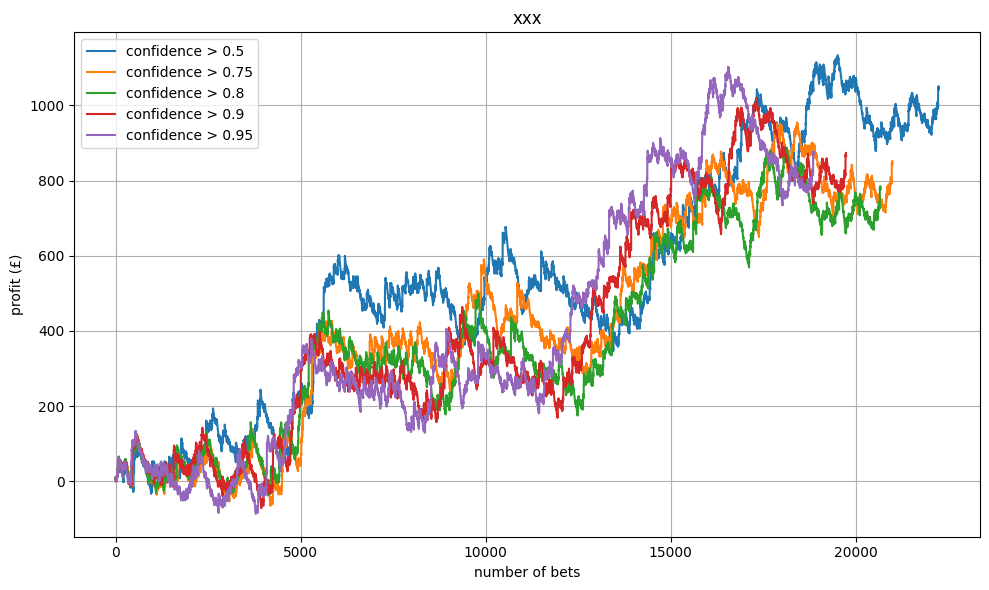

In [40]:
# Calculate evolutions of profits for each threshold

all_bets['cumulative_profit'] = all_bets['linear_target'].cumsum()

less2['cumulative_profit'] = less2['linear_target'].cumsum()

odd_2_5['cumulative_profit'] = odd_2_5['linear_target'].cumsum()

odd_5_10['cumulative_profit'] = odd_5_10['linear_target'].cumsum()

odd_10_25['cumulative_profit'] = odd_10_25['linear_target'].cumsum()

odd_25_50['cumulative_profit'] = odd_25_50['linear_target'].cumsum()

odd_above_10['cumulative_profit'] = odd_above_10['linear_target'].cumsum()


over075['cumulative_profit'] = over075['linear_target'].cumsum()

over08['cumulative_profit'] = over08['linear_target'].cumsum()

over09['cumulative_profit'] = over09['linear_target'].cumsum()

over095['cumulative_profit'] = over095['linear_target'].cumsum()

import matplotlib.pyplot as plt
# Plot
plt.figure(figsize=(10,6))
plt.plot(range(1, len(all_bets) + 1), all_bets['cumulative_profit'], label='confidence > 0.5')
plt.plot(range(1, len(over075) + 1), over075['cumulative_profit'], label='confidence > 0.75')
plt.plot(range(1, len(over08) + 1), over08['cumulative_profit'], label='confidence > 0.8')
plt.plot(range(1, len(over09) + 1), over09['cumulative_profit'], label='confidence > 0.9')
plt.plot(range(1, len(over095) + 1), over095['cumulative_profit'], label='confidence > 0.95')

# plt.plot(range(1, len(less2) + 1), less2['cumulative_profit'], label='<2 odds')
# plt.plot(range(1, len(odd_2_5) + 1), odd_2_5['cumulative_profit'], label='2-5 odds')
# plt.plot(range(1, len(odd_5_10) + 1), odd_5_10['cumulative_profit'], label='5-10 odds')
# plt.plot(range(1, len(odd_10_25) + 1), odd_10_25['cumulative_profit'], label='10-25 odds')
# plt.plot(range(1, len(odd_25_50) + 1), odd_25_50['cumulative_profit'], label='25-50 odds')
# plt.plot(range(1, len(odd_above_10) + 1), odd_above_10['cumulative_profit'], label='10+ odds')

plt.title("xxx")
plt.xlabel("number of bets")
plt.ylabel("profit (£)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
MLP2